# What are the most frequently used Computer Skills in Toronto?
## (Based on StackOverflow posts during 2017-07-08 to 2018-07-07.)

In [87]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import datetime

# Read the data from the result of the query file
# Download data from "https://data.stackexchange.com/stackoverflow/query/878134/toronto"
df=pd.read_csv("Toronto20170708_20180707.csv", sep=',')
#print (df.head())
locations = set(df['Location'].tolist())
#print(locations)
df1 = df.loc[:,['Date','TagName','TagId']]
#print (df1)
print('We are investigating', len(df1), 'posts between', min(df1['Date']),'to', max(df1['Date']),\
      'from', len(locations), 'locations: ', locations, '\n')
#print(df1.sort_values(('Date'),ascending=False))
df2 = df1.loc[:, ['TagName','TagId']]
#print(df2)
df4 = df2.groupby(['TagName']).agg({'count'}).sort_values(('TagId','count'),ascending=False).head(5)
most_frequent_skills = df4.index.tolist()

We are investigating 11707 posts between 2017-07-08 03:48:34 to 2018-07-06 21:21:11 from 3 locations:  {'Toronto', 'Toronto, ON, Canada', 'Toronto, ON'} 



# What is the most frequent skill used in Toronto during last year?

most_frequent_skills:  ['javascript', 'python', 'android', 'php', 'java']

As it can be seen from the chart, javascript is the most used computer skill.

Most frequent recent computer skills used in Toronto 
 between 2017-07-08 03:48:34 to 2018-07-06 21:21:11


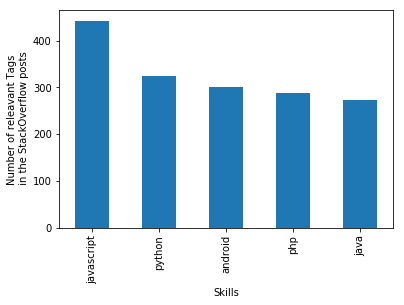

In [88]:
print('most_frequent_skills: ',most_frequent_skills)

print('\nAs it can be seen from the chart,', df4[('TagId','count')].idxmax(), 'is the most used computer skill.\n')

fig = df4.plot.bar(title = print('Most frequent recent computer skills used in Toronto \n between', min(df1['Date']), 'to',  max(df1['Date'])));
fig.legend_.remove();
fig.set_xlabel("Skills");
fig.set_ylabel("Number of releavant Tags\n in the StackOverflow posts");

# What is the technology trend in Toronto?

            Jan  Feb  Mar  Apr  May  Jun  Jul
android      15   27   28   30   31   38    3
java         19   30   35   25   40   23    1
javascript   58   33   53   48   35   34    8
php          18   17   29   35   32   22    3
python       17   48   23   31   46   41    4


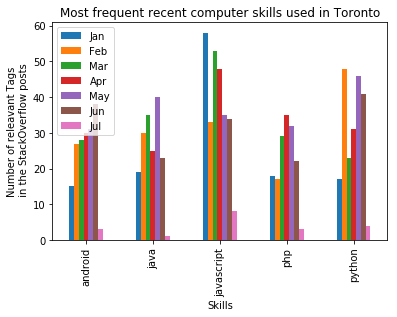

In [89]:
df50 = df.loc[:, ['Date','TagName','TagId']].sort_values(('Date'),ascending=True)
df51 = df50.drop(df50[(~df50['TagName'].isin(most_frequent_skills))].index)
df51['Date'] = pd.to_datetime(df51.Date, format='%Y-%m-%d')
df51['Month'] = pd.DatetimeIndex(df51['Date']).month
df51['Year'] = pd.DatetimeIndex(df51['Date']).year
df52 = df51.loc[:,['Year','Month', 'TagName', 'TagId']]
df53 = df52.drop(df52[(df52['Year'] != 2018)].index)
df53 = df53.drop(columns = 'Year')
#print('df53:\n',df53.head())
df55 = df53.groupby(['TagName', 'Month']).agg({'count'}).sort_values(('TagId','count'),ascending=False) 
#print('d55:\n', df55)
data = pd.DataFrame()
month_list = []
for i in df53['Month'].unique():
    MM = df55.xs(i, level = 1)
    month_list.append(calendar.month_abbr[i])
    data = pd.concat([data,MM], axis=1, join='outer')
data.columns = month_list
print(data)
fig = data.plot.bar(title = 'Most frequent recent computer skills used in Toronto');
fig.set_xlabel("Skills");
fig.set_ylabel("Number of releavant Tags\n in the StackOverflow posts");